In [58]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Problem 1 a)

<class 'pandas.core.series.Series'>
ratio of classes is 1365/95 = 14.368


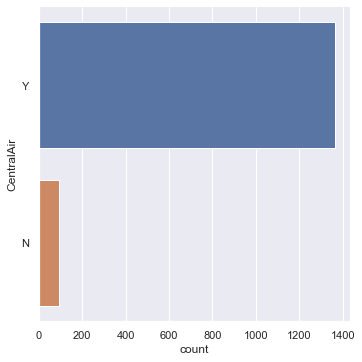

In [59]:
dat = pd.read_csv('train.csv')
print(type(dat.dtypes))
cair = pd.DataFrame(dat['CentralAir'])
sp = pd.DataFrame(dat['SalePrice'])
sb.catplot(y = 'CentralAir', data = cair, kind = "count")
dat["CentralAir"].value_counts()
print("ratio of classes is 1365/95 = 14.368")

# 1 b)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

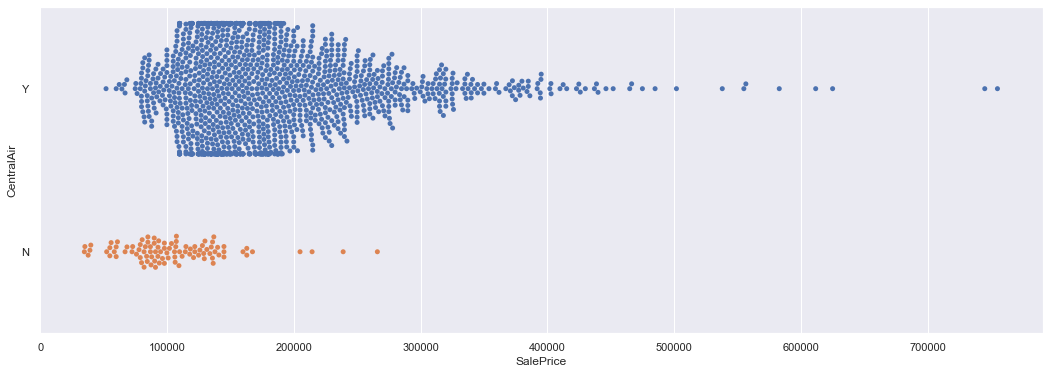

<Figure size 432x288 with 0 Axes>

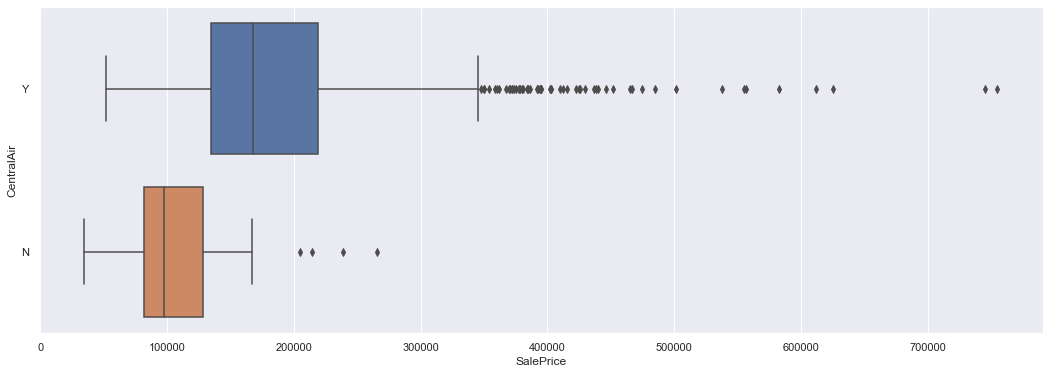

In [60]:
df = pd.concat([cair, sp], axis = 1).reindex(sp.index)
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = df, orient = "h")
plt.figure()
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = df, orient = "h")

# 1c)

In [61]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# 1d)

In [62]:
#cair_train = pd.DataFrame(cair[:1100])
#sp_train = pd.DataFrame(sp[:1100])

#cair_test = pd.DataFrame(cair[-360:])
#sp_test = pd.DataFrame(sp[-360:])


from sklearn.model_selection import train_test_split
sp_train, sp_test, cair_train, cair_test = train_test_split(sp, cair, test_size = 0.25)


# 1e)

In [63]:
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(sp_train, cair_train)

DecisionTreeClassifier(max_depth=2)

# 1f)

[Text(334.8, 543.6, 'SalePrice <= 102500.0\ngini = 0.118\nsamples = 1095\nvalue = [69, 1026]\nclass = Central Air Con'),
 Text(167.4, 326.16, 'SalePrice <= 63250.0\ngini = 0.471\nsamples = 95\nvalue = [36, 59]\nclass = Central Air Con'),
 Text(83.7, 108.72000000000003, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = No Central Air Con'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.433\nsamples = 85\nvalue = [27, 58]\nclass = Central Air Con'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 141250.0\ngini = 0.064\nsamples = 1000\nvalue = [33, 967]\nclass = Central Air Con'),
 Text(418.5, 108.72000000000003, 'gini = 0.166\nsamples = 285\nvalue = [26, 259]\nclass = Central Air Con'),
 Text(585.9, 108.72000000000003, 'gini = 0.019\nsamples = 715\nvalue = [7, 708]\nclass = Central Air Con')]

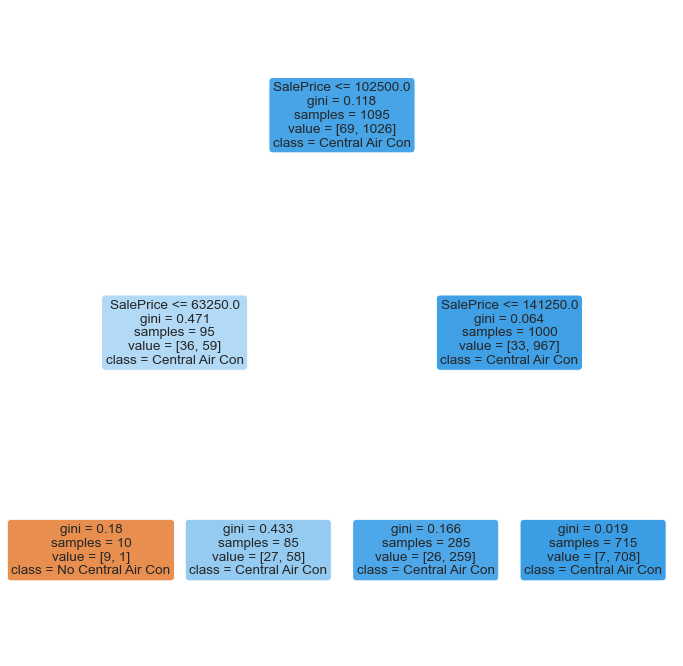

In [64]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central Air Con","Central Air Con"])

# 1g)

<AxesSubplot:>

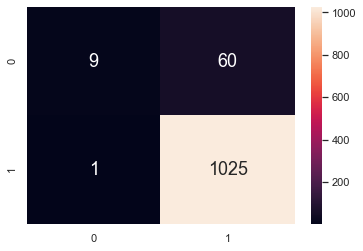

In [65]:
# Predict Legendary corresponding to Total Train
cair_train_pred = dectree.predict(sp_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cair_train, cair_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# 1h)

In [66]:
cm1 = confusion_matrix(cair_train, cair_train_pred)
TN = cm1[0][0]
FP = cm1[0][1]
FN = cm1[1][0]
TP = cm1[1][1]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)


# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sp_train, cair_train))
print("True Positive Rate: {}".format(TPR))
print("True Negative Rate: {}".format(TNR))
print("False Positive Rate: {}".format(FPR))
print("False Negative Rate: {}".format(FNR))

Classification Accuracy 	: 0.9442922374429223
True Positive Rate: 0.9990253411306043
True Negative Rate: 0.13043478260869565
False Positive Rate: 0.8695652173913043
False Negative Rate: 0.0009746588693957114


# 1i)

Classification Accuracy 	: 0.9342465753424658


<AxesSubplot:>

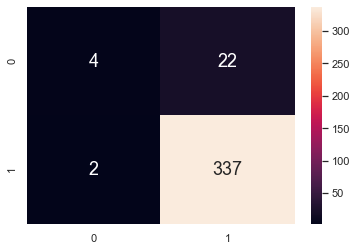

In [67]:
# Predict Legendary corresponding to Total Test
cair_test_pred = dectree.predict(sp_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sp_test, cair_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cair_test, cair_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# 1j)

In [68]:
cm2 = confusion_matrix(cair_test, cair_test_pred)
TN = cm2[0][0]
FP = cm2[0][1]
FN = cm2[1][0]
TP = cm2[1][1]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)


# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sp_train, cair_train))
print("True Positive Rate: {}".format(TPR))
print("True Negative Rate: {}".format(TNR))
print("False Positive Rate: {}".format(FPR))
print("False Negative Rate: {}".format(FNR))

Classification Accuracy 	: 0.9442922374429223
True Positive Rate: 0.9941002949852508
True Negative Rate: 0.15384615384615385
False Positive Rate: 0.8461538461538461
False Negative Rate: 0.0058997050147492625


# Problem 2

<class 'pandas.core.series.Series'>
ratio of classes is 1365/95 = 14.368


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

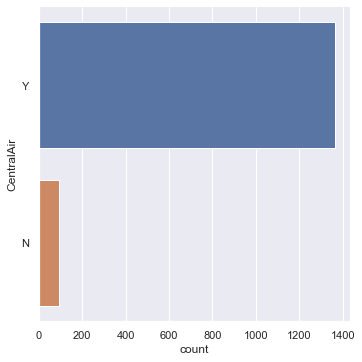

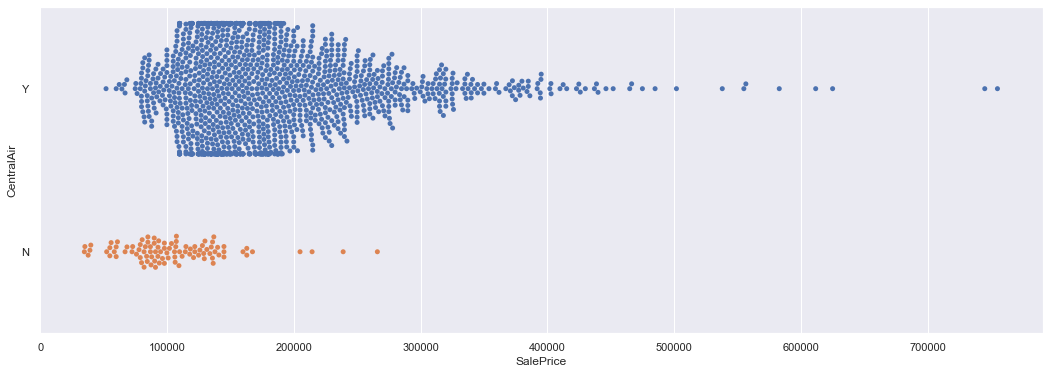

<Figure size 432x288 with 0 Axes>

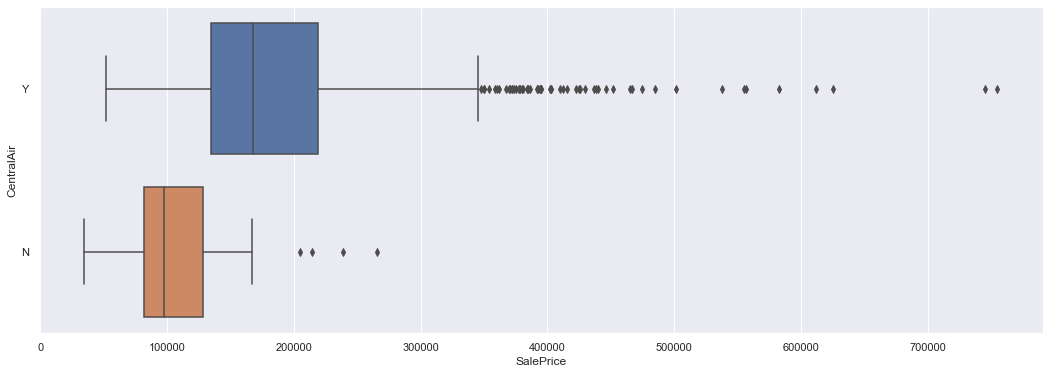

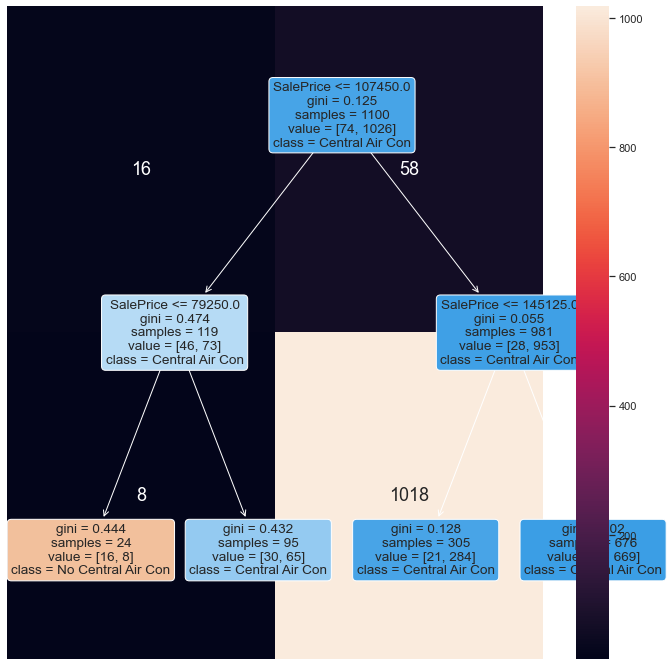

In [69]:
#1a
dat = pd.read_csv('train.csv')
print(type(dat.dtypes))
cair = pd.DataFrame(dat['CentralAir'])
sp = pd.DataFrame(dat['SalePrice'])
sb.catplot(y = 'CentralAir', data = cair, kind = "count")
dat["CentralAir"].value_counts()
print("ratio of classes is 1365/95 = 14.368")


#1b
df = pd.concat([cair, sp], axis = 1).reindex(sp.index)
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = df, orient = "h")
plt.figure()
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = df, orient = "h")

#1c
from sklearn.tree import DecisionTreeClassifier

#1d
cair_train = pd.DataFrame(cair[:1100])
sp_train = pd.DataFrame(sp[:1100])

cair_test = pd.DataFrame(cair[-360:])
sp_test = pd.DataFrame(sp[-360:])

#1e
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(sp_train, cair_train)

#1f
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central Air Con","Central Air Con"])

#1g
cair_train_pred = dectree.predict(sp_train)

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cair_train, cair_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})